<a href="https://colab.research.google.com/github/CommunityRADvocate/ida3-fall24-colabs/blob/main/IDA_Fall_2024_Project_Examples.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Introduction
---

In this project, you will compile an Exploratory Data Analysis using Python of our e-commerce dataset. This notebook contains the starter code to import the data using Pandas.

You will need to run each block of code in the setup section, each time you open the notebook, in order to work on your analysis.

#Setup
---
We set up our Colab by installing, importing, and enabling the usage of a few Python libraries within Colab, as well as authenticating this Colab runtime and then setting up a BigQuery client with the appropriate Cloud project_id. This follows closely the instructions in the ["Getting started with BigQuery"](https://colab.sandbox.google.com/notebooks/bigquery.ipynb#scrollTo=SeTJb51SKs_W)
example Colab.

In [ ]:
#@title Install Latest Version of Some Packages
!pip install --upgrade chart_studio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.4/64.4 kB 2.9 MB/s eta 0:00:00


***Check the output from the cell above, as it may require restarting the Colab runtime for the upgrades to take effect in the environment. You can pick up from this point after restarting.***

In [ ]:
#@title Import Python Libraries & Some Other Setup
# Basic Python data science libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Enable displaying pandas data frames as interactive tables by default
from google.colab import data_table
data_table.enable_dataframe_formatter()

The authentication step in the next cell will require manually going through some pop-up screens and copy/pasting an authentication code from another window back into the cell to complete (on the 1st run; may run automatically thereafter).

In [ ]:
#@title Provide Google Credentials to Colab Runtime (May Require Manually Copy/Pasting Authentication Code)
from google.colab import auth
auth.authenticate_user()
print('Authenticated')

Authenticated



##Please enter your own Google Cloud/BigQuery project ID in the form below, then run the cell to set up the BigQuery client.
1. Visit the [GCP console](https://console.cloud.google.com) and copy the project id field.
2. If you haven't set up BigQuery and don't have a project ID to enter, follow Remy's instructions [here](https://introtogcode.slack.com/archives/C07JABBBU74/p1728489799749529)
3. Fill in the project ID where it says 'YOUR PROJECT ID HERE' below

In [ ]:
# this is Nicole's bigquery
from google.cloud import bigquery
client = bigquery.Client(project='ida-spring-24')

#Pull in e-commerce data
----
In this section, we look at how to get each table in our e-commerce dataset. The commented out code at the end can be uncommented for an individual line to see a sample of the data.

In [ ]:
sql_query = """ SELECT * FROM bigquery-public-data.thelook_ecommerce.distribution_centers """
distribution_centers = client.query(sql_query).to_dataframe()
sql_query = """ SELECT * FROM bigquery-public-data.thelook_ecommerce.events """
events = client.query(sql_query).to_dataframe()
sql_query = """ SELECT * FROM bigquery-public-data.thelook_ecommerce.inventory_items """
inventory_items = client.query(sql_query).to_dataframe()
sql_query = """ SELECT * FROM bigquery-public-data.thelook_ecommerce.order_items """
order_items = client.query(sql_query).to_dataframe()
sql_query = """ SELECT * FROM bigquery-public-data.thelook_ecommerce.orders """
orders = client.query(sql_query).to_dataframe()
sql_query = """ SELECT * FROM bigquery-public-data.thelook_ecommerce.products """
products = client.query(sql_query).to_dataframe()
sql_query = """ SELECT * FROM bigquery-public-data.thelook_ecommerce.users """
users = client.query(sql_query).to_dataframe()

Explore the data: uncomment out whichever line to view the first 5 entries in any of the tables.

In [ ]:
#distribution_centers.head()
#events.head()
#inventory_items.head()
#order_items.head()
#orders.head()
#products.head()
#users.head()

In [ ]:
distribution_centers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        10 non-null     Int64  
 1   name                      10 non-null     object 
 2   latitude                  10 non-null     float64
 3   longitude                 10 non-null     float64
 4   distribution_center_geom  10 non-null     object 
dtypes: Int64(1), float64(2), object(2)
memory usage: 538.0+ bytes


In [ ]:
events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2425397 entries, 0 to 2425396
Data columns (total 13 columns):
 #   Column           Dtype              
---  ------           -----              
 0   id               Int64              
 1   user_id          Int64              
 2   sequence_number  Int64              
 3   session_id       object             
 4   created_at       datetime64[us, UTC]
 5   ip_address       object             
 6   city             object             
 7   state            object             
 8   postal_code      object             
 9   browser          object             
 10  traffic_source   object             
 11  uri              object             
 12  event_type       object             
dtypes: Int64(3), datetime64[us, UTC](1), object(9)
memory usage: 247.5+ MB


In [ ]:
inventory_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 490169 entries, 0 to 490168
Data columns (total 12 columns):
 #   Column                          Non-Null Count   Dtype              
---  ------                          --------------   -----              
 0   id                              490169 non-null  Int64              
 1   product_id                      490169 non-null  Int64              
 2   created_at                      490169 non-null  datetime64[us, UTC]
 3   sold_at                         181314 non-null  datetime64[us, UTC]
 4   cost                            490169 non-null  float64            
 5   product_category                490169 non-null  object             
 6   product_name                    490169 non-null  object             
 7   product_brand                   490169 non-null  object             
 8   product_retail_price            490169 non-null  float64            
 9   product_department              490169 non-null  object             
 

In [ ]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125025 entries, 0 to 125024
Data columns (total 9 columns):
 #   Column        Non-Null Count   Dtype              
---  ------        --------------   -----              
 0   order_id      125025 non-null  Int64              
 1   user_id       125025 non-null  Int64              
 2   status        125025 non-null  object             
 3   gender        125025 non-null  object             
 4   created_at    125025 non-null  datetime64[us, UTC]
 5   returned_at   12510 non-null   datetime64[us, UTC]
 6   shipped_at    81181 non-null   datetime64[us, UTC]
 7   delivered_at  43775 non-null   datetime64[us, UTC]
 8   num_of_item   125025 non-null  Int64              
dtypes: Int64(3), datetime64[us, UTC](4), object(2)
memory usage: 8.9+ MB


In [ ]:
merged_orders = orders.merge(order_items, on='order_id')
merged_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181314 entries, 0 to 181313
Data columns (total 19 columns):
 #   Column             Non-Null Count   Dtype              
---  ------             --------------   -----              
 0   order_id           181314 non-null  Int64              
 1   user_id_x          181314 non-null  Int64              
 2   status_x           181314 non-null  object             
 3   gender             181314 non-null  object             
 4   created_at_x       181314 non-null  datetime64[us, UTC]
 5   returned_at_x      18095 non-null   datetime64[us, UTC]
 6   shipped_at_x       117615 non-null  datetime64[us, UTC]
 7   delivered_at_x     63386 non-null   datetime64[us, UTC]
 8   num_of_item        181314 non-null  Int64              
 9   id                 181314 non-null  Int64              
 10  user_id_y          181314 non-null  Int64              
 11  product_id         181314 non-null  Int64              
 12  inventory_item_id  181314 non-

In [ ]:
order_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181314 entries, 0 to 181313
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype              
---  ------             --------------   -----              
 0   id                 181314 non-null  Int64              
 1   order_id           181314 non-null  Int64              
 2   user_id            181314 non-null  Int64              
 3   product_id         181314 non-null  Int64              
 4   inventory_item_id  181314 non-null  Int64              
 5   status             181314 non-null  object             
 6   created_at         181314 non-null  datetime64[us, UTC]
 7   shipped_at         117615 non-null  datetime64[us, UTC]
 8   delivered_at       63386 non-null   datetime64[us, UTC]
 9   returned_at        18095 non-null   datetime64[us, UTC]
 10  sale_price         181314 non-null  float64            
dtypes: Int64(5), datetime64[us, UTC](4), float64(1), object(1)
memory usage: 16.1+ MB


In [ ]:
order_items['status'].value_counts()

,count
status,
Shipped,54229
Complete,45291
Processing,35985
Cancelled,27714
Returned,18095


<Axes: xlabel='status'>

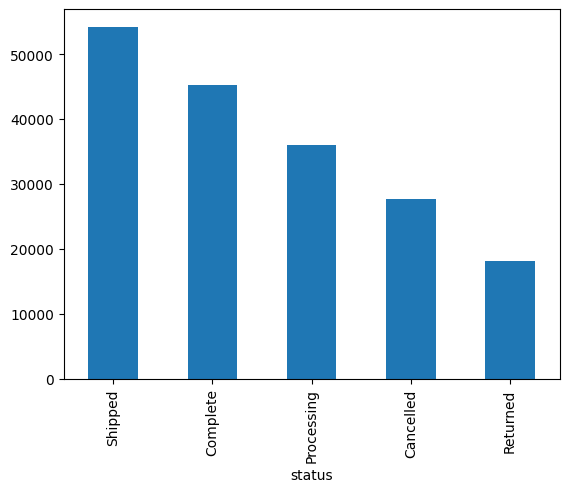

In [ ]:
# use matplotlib to create a bar chart with counts by status
order_items['status'].value_counts().plot(kind='bar')

<Axes: ylabel='count'>

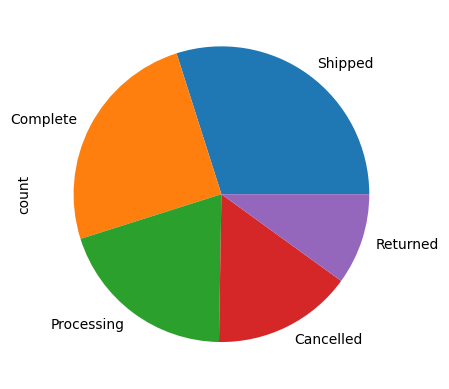

In [ ]:
# use matplotlib to create a pie chart with counts by status
order_items['status'].value_counts().plot(kind='pie')

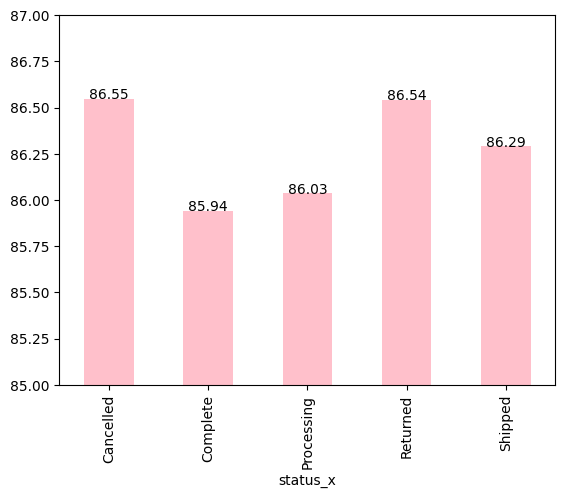

In [ ]:
 # use group by to get total order cost from merged by order id, include order status
 total_order_cost = merged_orders.groupby(['order_id', 'status_x'])['sale_price'].sum().reset_index()
 total_order_cost.head()

# get average sale_price by status_x from total_order_cost
 avg_sale_price = total_order_cost.groupby('status_x')['sale_price'].mean()

 # graph average order cost by status
 avg_sale_price.plot(kind='bar', color='pink')

 # set axes from 80 to 100
 plt.ylim(85, 87)

# add data labels
 for i in range(len(avg_sale_price)):
   plt.text(i, avg_sale_price.iloc[i], round(avg_sale_price.iloc[i], 2), ha='center')

In [ ]:
products.describe()

,id,cost,retail_price,distribution_center_id
count,29120.0,29120.000000,29120.000000,29120.0
mean,14560.5,28.481774,59.220164,4.982898
std,8406.364256,30.624681,65.888927,2.901153
min,1.0,0.008300,0.020000,1.0
25%,7280.75,11.275613,24.000000,2.0
50%,14560.5,19.675081,39.990002,5.0
75%,21840.25,34.440000,69.949997,8.0
max,29120.0,557.151002,999.000000,10.0


In [ ]:
products['profit'] = products['retail_price'] - products['cost']
products.head()

,id,cost,category,name,brand,retail_price,department,sku,distribution_center_id,profit
0,13842,2.51875,Accessories,Low Profile Dyed Cotton Twill Cap - Navy W39S55D,MG,6.25,Women,EBD58B8A3F1D72F4206201DA62FB1204,1,3.73125
1,13928,2.33835,Accessories,Low Profile Dyed Cotton Twill Cap - Putty W39S55D,MG,5.95,Women,2EAC42424D12436BDD6A5B8A88480CC3,1,3.61165
2,14115,4.87956,Accessories,Enzyme Regular Solid Army Caps-Black W35S45D,MG,10.99,Women,EE364229B2791D1EF9355708EFF0BA34,1,6.11044
3,14157,4.64877,Accessories,Enzyme Regular Solid Army Caps-Olive W35S45D (...,MG,10.99,Women,00BD13095D06C20B11A2993CA419D16B,1,6.34123
4,14273,6.50793,Accessories,Washed Canvas Ivy Cap - Black W11S64C,MG,15.99,Women,F531DC20FDE20B7ADF3A73F52B71D0AF,1,9.48207


In [ ]:
products[['cost', 'retail_price', 'profit']].describe()

,cost,retail_price,profit
count,29120.000000,29120.000000,29120.000000
mean,28.481774,59.220164,30.738390
std,30.624681,65.888927,36.251412
min,0.008300,0.020000,0.011700
25%,11.275613,24.000000,11.607833
50%,19.675081,39.990002,20.059720
75%,34.440000,69.949997,35.840000
max,557.151002,999.000000,594.404999


Text(0.5, 1.0, 'Average Profit by Category')

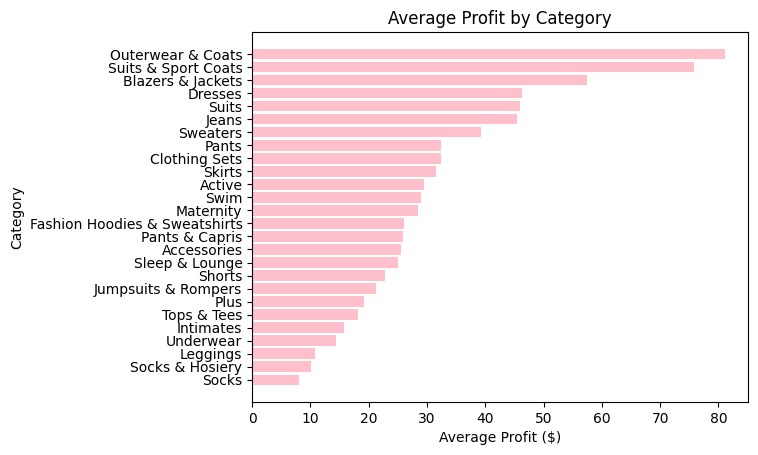

In [ ]:
# get average profit by category
avg_profit = products.groupby('category')['profit'].mean()

# order from highest to least profitable
avg_profit = avg_profit.sort_values(ascending=True)

# use horizontal bars
plt.barh(avg_profit.index, avg_profit, color='pink')

# add x and y labels
plt.xlabel('Average Profit ($)')
plt.ylabel('Category')

# add title
plt.title('Average Profit by Category')


Text(0, 0.5, 'Profit ($)')

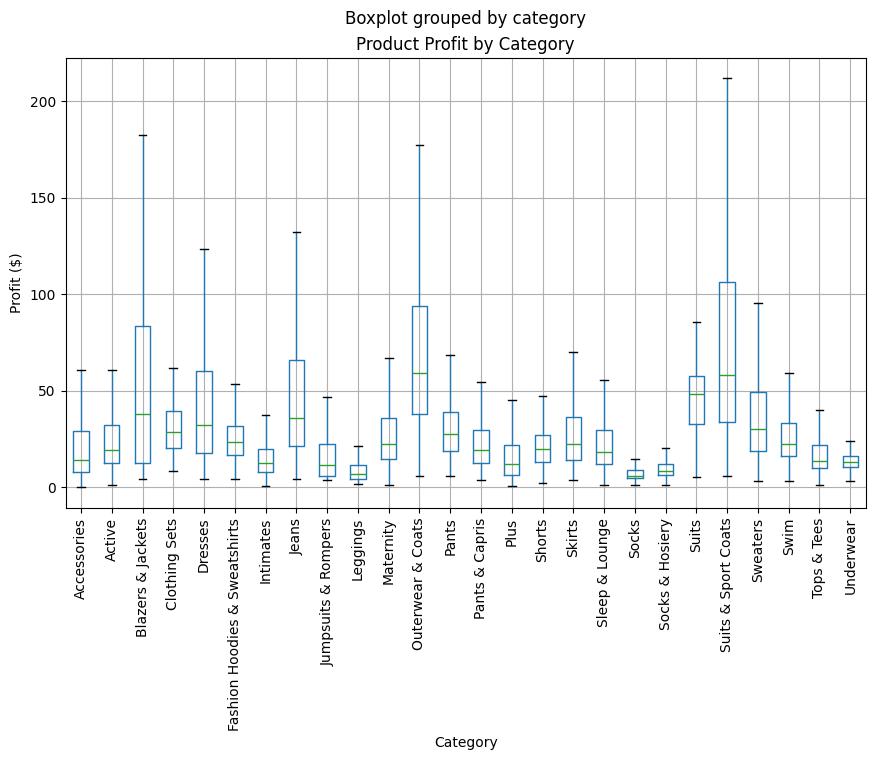

In [ ]:
# box plot of profit by category, don't show outliers
products.boxplot(column='profit', by='category', figsize=(10, 6), showfliers=False)

# add title
plt.title('Product Profit by Category')

# turn category labels 90 degrees
plt.xticks(rotation=90)

# add axis labels
plt.xlabel('Category')
plt.ylabel('Profit ($)')